In [1]:
import lightgbm
print(lightgbm.__version__)

3.2.1


# 위스콘신 Breast Cancer 데이터 로드 및 LightGBM 적용

In [3]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 학습/ 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state = 216)

# LGBM
lgbm_wrapper = LGBMClassifier(n_estimator=400)

evals = [(X_test, y_test)] # 실제는 검증 데이터로 evaluation해야함
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's binary_logloss: 0.586464
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.527528
[3]	valid_0's binary_logloss: 0.477945
[4]	valid_0's binary_logloss: 0.436981
[5]	valid_0's binary_logloss: 0.403164
[6]	valid_0's binary_logloss: 0.369138
[7]	valid_0's binary_logloss: 0.33541
[8]	valid_0's binary_logloss: 0.310756
[9]	valid_0's binary_logloss: 0.285466
[10]	valid_0's binary_logloss: 0.26575
[11]	valid_0's binary_logloss: 0.244754
[12]	valid_0's binary_logloss: 0.230235
[13]	valid_0's binary_logloss: 0.214767
[14]	valid_0's binary_logloss: 0.200131
[15]	valid_0's binary_logloss: 0.191045
[16]	valid_0's binary_logloss: 0.180675
[17]	valid_0's binary_logloss: 0.172387
[18]	valid_0's binary_logloss: 0.163753
[19]	valid_0's binary_logloss: 0.157103
[20]	valid_0's binary_logloss: 0.148318
[21]	valid_0's binary_logloss: 0.141367
[22]	valid_0's binary_logloss: 0.132926
[23]	valid_0's bi

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f},\
    F1: {f1:.4f}, AUC: {roc_auc:.4f}")

In [5]:
get_clf_eval(y_test, preds, pred_proba)

오차행렬
[[39  4]
 [ 1 70]]
정확도: 0.9561, 정밀도: 0.9459, 재현율: 0.9859,    F1: 0.9655, AUC: 0.9967


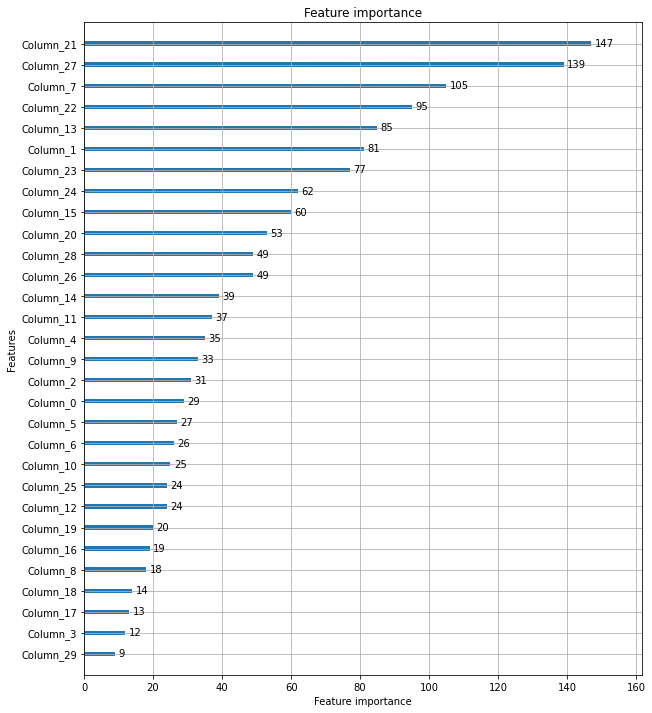

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)